In [7]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

In [20]:
df=pd.read_csv('D:\\Python Projects\\Clustering\cars.csv')
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13,3640,non-USA,BMW 535i


In [21]:
df.dtypes

Manufacturer           object
Model                  object
Type                   object
Min.Price             float64
Price                 float64
Max.Price             float64
MPG.city                int64
MPG.highway             int64
AirBags                object
DriveTrain             object
Cylinders              object
EngineSize            float64
Horsepower              int64
RPM                     int64
Rev.per.mile            int64
Man.trans.avail        object
Fuel.tank.capacity    float64
Passengers              int64
Length                  int64
Wheelbase               int64
Width                   int64
Turn.circle             int64
Rear.seat.room        float64
Luggage.room          float64
Weight                  int64
Origin                 object
Make                   object
dtype: object

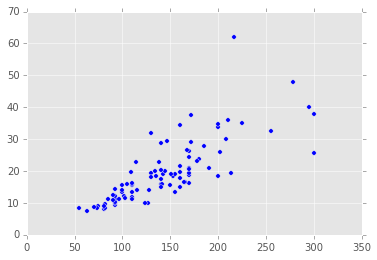

In [9]:
plt.scatter(df.Horsepower,df.Price)

In [23]:
df=df[['Horsepower','RPM','MPG.city', 'MPG.highway', 'Price']]
df.describe()
#Values at different scale, needs normalizing befor implementation of distance metrics

,Horsepower,RPM,MPG.city,MPG.highway,Price
count,93.000000,93.000000,93.000000,93.000000,93.000000
mean,143.827957,5280.645161,22.365591,29.086022,19.509677
std,52.374410,596.731690,5.619812,5.331726,9.659430
min,55.000000,3800.000000,15.000000,20.000000,7.400000
25%,103.000000,4800.000000,18.000000,26.000000,12.200000
50%,140.000000,5200.000000,21.000000,28.000000,17.700000
75%,170.000000,5750.000000,25.000000,31.000000,23.300000
max,300.000000,6500.000000,46.000000,50.000000,61.900000


### Centre and Scaling

In [24]:
from sklearn import preprocessing
df['Horsepower']=preprocessing.scale(df['Horsepower'].astype('float64'))
df['RPM']=preprocessing.scale(df['RPM'].astype('float64'))
df['MPG.city']=preprocessing.scale(df['MPG.city'].astype('float64'))
df['MPG.highway']=preprocessing.scale(df['MPG.highway'].astype('float64'))
df['Price']=preprocessing.scale(df['Price'].astype('float64'))
df.describe()

,Horsepower,RPM,MPG.city,MPG.highway,Price
count,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01
mean,2.530831e-16,-5.228792e-16,-2.471142e-16,7.759623e-18,-2.077191e-16
std,1.005420e+00,1.005420e+00,1.005420e+00,1.005420e+00,1.005420e+00
min,-1.705211e+00,-2.494706e+00,-1.317751e+00,-1.713379e+00,-1.260459e+00
25%,-7.837654e-01,-8.098285e-01,-7.810321e-01,-5.819406e-01,-7.608417e-01
50%,-7.348445e-02,-1.358773e-01,-2.443130e-01,-2.047944e-01,-1.883637e-01
75%,5.024190e-01,7.908056e-01,4.713125e-01,3.609249e-01,3.945229e-01
max,2.998001e+00,2.054464e+00,4.228346e+00,3.943814e+00,4.412277e+00


In [29]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=4)
model.fit(df[['Horsepower','Price']][0:100])
prediction=model.predict(df[['Horsepower','Price']][0:100])
prediction
#Clustering for 02 dimensions and 100 rows
#Creating 04 clusters 0,1,2,3

array([0, 1, 1, 1, 1, 3, 0, 0, 1, 1, 2, 3, 3, 0, 3, 0, 0, 0, 2, 0, 0, 1, 3,
       3, 3, 0, 3, 2, 3, 0, 3, 3, 3, 3, 3, 0, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3,
       3, 2, 1, 2, 1, 1, 3, 3, 0, 0, 2, 1, 2, 3, 0, 3, 1, 3, 0, 0, 0, 0, 3,
       0, 0, 3, 3, 3, 0, 0, 0, 1, 3, 3, 3, 0, 3, 3, 0, 0, 0, 3, 3, 0, 0, 0,
       1])

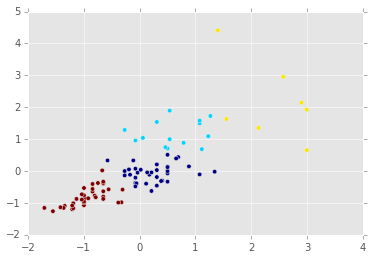

In [30]:
plt.scatter(df['Horsepower'][0:100],df['Price'][0:100],c=prediction)

In [36]:
#Clustering for 05 numeric columns and all rows
model=KMeans(n_clusters=4)
model.fit(df.loc[0:,'Horsepower':'Price'])#All columns from HP to Price
prediction=model.predict(df.loc[0:,'Horsepower':'Price'])
prediction

array([0, 1, 1, 1, 1, 0, 3, 3, 3, 3, 1, 0, 0, 3, 0, 3, 3, 3, 1, 0, 0, 3, 2,
       0, 0, 3, 0, 1, 2, 1, 2, 0, 3, 0, 0, 3, 3, 3, 2, 2, 0, 2, 0, 2, 0, 0,
       0, 1, 3, 1, 3, 3, 2, 2, 0, 3, 1, 3, 1, 0, 3, 2, 1, 2, 0, 3, 3, 0, 0,
       3, 3, 0, 2, 0, 3, 3, 3, 1, 2, 2, 0, 0, 2, 2, 0, 0, 3, 0, 3, 0, 1, 0,
       1])

### Finding Optimal Number of Clusters

In [42]:
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df.loc[0:,'Horsepower':'Price'])
    meanDistortions.append(sum(np.min(cdist(df.loc[0:,'Horsepower':'Price'],model.cluster_centers_,'euclidean'),axis=1))/df.loc[0:,'Horsepower':'Price'].shape[0])

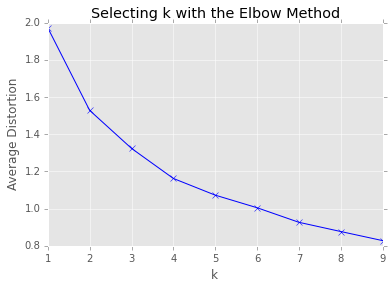

In [44]:
plt.plot(clusters,meanDistortions,'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with the Elbow Method')
# The point at which the knee appears tell about the optimal clsuters in the dataset